# Calls to fromLExprAux

In [8]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Read the file
with open('fromLExprAuxCalls.txt', 'r') as f:
    lines = f.readlines()

# Display first few lines to verify
print("First 5 lines:")
for i, line in enumerate(lines[:5]):
    print(f"{i+1}: {line.strip()}")

First 5 lines:
1: Call fromLExprAux with (init_tickingClock_0)
2: Call fromLExprAux with ((∀ ((~allocationTime ~null) == (~Int.Neg (#1 : int)))))
3: Call fromLExprAux with (((~allocationTime ~null) == (~Int.Neg (#1 : int))))
4: Call fromLExprAux with ((~allocationTime ~null))
5: Call fromLExprAux with (~allocationTime)


In [9]:
# Extract expressions using regex
pattern = r'Call fromLExprAux with \((.*)\)'
expressions = []

for line in lines:
    match = re.search(pattern, line.strip())
    if match:
        expr = match.group(1)
        expressions.append(expr)

print(f"Total expressions found: {len(expressions)}")
print("\nFirst 10 expressions:")
for i, expr in enumerate(expressions[:10]):
    print(f"{i+1}: {expr}")


Total expressions found: 706

First 10 expressions:
1: init_tickingClock_0
2: (∀ ((~allocationTime ~null) == (~Int.Neg (#1 : int))))
3: ((~allocationTime ~null) == (~Int.Neg (#1 : int)))
4: (~allocationTime ~null)
5: ~allocationTime
6: ~null
7: (~Int.Neg (#1 : int))
8: ~Int.Neg
9: (#1 : int)
10: (∀ ((~Bool.And (~isInt (~BoxingInt %0))) ((~UnboxingInt (~BoxingInt %0)) == %0)))


In [10]:
# Count frequencies
expr_counts = Counter(expressions)

# Sort by frequency (descending)
sorted_counts = expr_counts.most_common()

print("Expression frequencies:")
for expr, count in sorted_counts:
    print(f"{count:3d}: {expr}")




Expression frequencies:
 51: ~select
 22: ref1
 16: ref2
 16: heap_var
 15: ~nextField
 14: ~UnboxingRef
 12: ~UnboxingInt
 10: heap
  9: ~Bool.And
  9: ~Bool.Implies
  9: ~lycheeField
  9: ~pineappleField
  9: (~select heap)
  9: (~select heap_var)
  8: (testedRef : Ref)
  7: ~Bool.Not
  7: tickingClock
  7: (#0 : int)
  7: (~select newHeap)
  7: newHeap
  6: ~allocationTime
  6: ($__var14 : $__ty182)
  5: (#1 : int)
  5: ~BoxingInt
  5: methodEntryTime
  4: ~isInt
  4: ~isContainer
  4: ~isContainerStruct
  4: ~Int.Ge
  4: (~select ((~select heap) ref1))
  4: ((~select heap) ref1)
  4: (~select ((~select heap) ref2))
  4: ((~select heap) ref2)
  4: (~UpdateContainersModifiesFrame heap_var)
  4: ~UpdateContainersModifiesFrame
  4: (((~Bool.Or : (arrow bool (arrow bool bool))) ((testedRef : Ref) == (ref1 : Ref))) (((~Int.Ge : (arrow int (arrow int bool))) ((~allocationTime : (arrow Ref int)) (testedRef : Ref))) (methodEntryTime : int)))
  4: ((~Bool.Or : (arrow bool (arrow bool bool)))

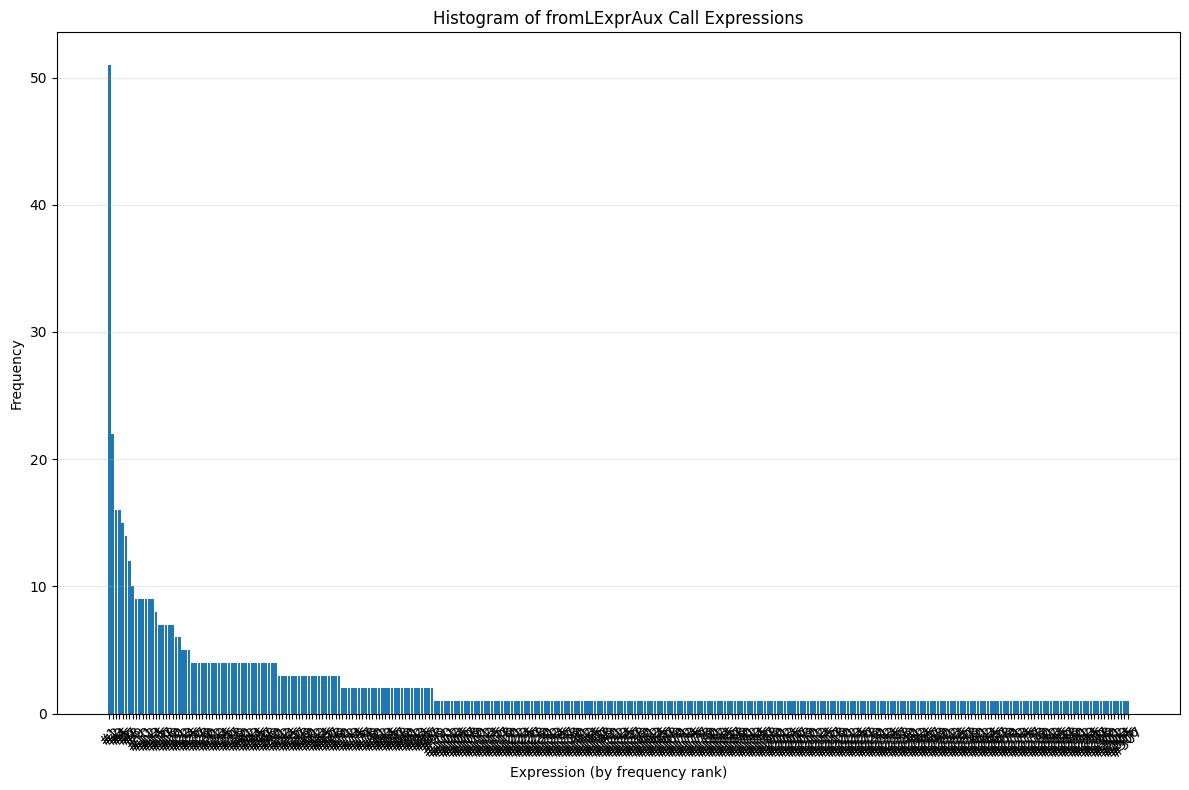

In [11]:
# Create histogram
plt.figure(figsize=(12, 8))

# Get expressions and their counts
exprs, counts = zip(*sorted_counts)

# Create bar plot
plt.bar(range(len(exprs)), counts)
plt.xlabel('Expression (by frequency rank)')
plt.ylabel('Frequency')
plt.title('Histogram of fromLExprAux Call Expressions')

# Rotate x-axis labels for better readability
plt.xticks(range(len(exprs)), [f"#{i+1}" for i in range(len(exprs))], rotation=45)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Create a more detailed plot with actual expressions (for smaller datasets)
if len(sorted_counts) <= 20:  # Only show labels if not too many expressions
    plt.figure(figsize=(15, 8))
    
    exprs, counts = zip(*sorted_counts)
    
    plt.bar(range(len(exprs)), counts)
    plt.xlabel('Expression')
    plt.ylabel('Frequency')
    plt.title('Histogram of fromLExprAux Call Expressions (with labels)')
    
    # Truncate long expressions for display
    truncated_exprs = [expr[:50] + "..." if len(expr) > 50 else expr for expr in exprs]
    plt.xticks(range(len(exprs)), truncated_exprs, rotation=45, ha='right')
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"Too many unique expressions ({len(sorted_counts)}) to show labels clearly.")
    print("Use the previous plot with numbered expressions.")


Too many unique expressions (307) to show labels clearly.
Use the previous plot with numbered expressions.


In [13]:
# Summary statistics
total_calls = len(expressions)
unique_expressions = len(expr_counts)
most_common_expr, max_freq = sorted_counts[0]

print("=== SUMMARY STATISTICS ===")
print(f"Total function calls: {total_calls}")
print(f"Unique expressions: {unique_expressions}")
print(f"Most frequent expression: {most_common_expr}")
print(f"Maximum frequency: {max_freq}")
print(f"Average frequency: {total_calls / unique_expressions:.2f}")

# Show distribution of frequencies
freq_distribution = Counter(expr_counts.values())
print(f"\nFrequency distribution:")
for freq, count in sorted(freq_distribution.items()):
    print(f"  {count} expressions appear {freq} time(s)")

=== SUMMARY STATISTICS ===
Total function calls: 706
Unique expressions: 307
Most frequent expression: ~select
Maximum frequency: 51
Average frequency: 2.30

Frequency distribution:
  209 expressions appear 1 time(s)
  28 expressions appear 2 time(s)
  19 expressions appear 3 time(s)
  26 expressions appear 4 time(s)
  3 expressions appear 5 time(s)
  2 expressions appear 6 time(s)
  5 expressions appear 7 time(s)
  1 expressions appear 8 time(s)
  6 expressions appear 9 time(s)
  1 expressions appear 10 time(s)
  1 expressions appear 12 time(s)
  1 expressions appear 14 time(s)
  1 expressions appear 15 time(s)
  2 expressions appear 16 time(s)
  1 expressions appear 22 time(s)
  1 expressions appear 51 time(s)


# Calls to fromLExprAux taking environment into account

In [14]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Read the file
with open('fromLExprAuxCallsWithEnv.txt', 'r') as f:
    content = f.read()

# Count total occurrences of "Call fromLExprAux at depth" for verification
total_calls = content.count("Call fromLExprAux at depth")
print(f"Total 'Call fromLExprAux at depth' occurrences found: {total_calls}")

# Display first part of content to verify
print("\nFirst 500 characters:")
print(content[:500])

Total 'Call fromLExprAux at depth' occurrences found: 706

First 500 characters:
Last login: Fri Aug  8 10:13:27 on ttys005
❯ lake exe StrataVerify Examples/HeapReasoning.boogie.st
ℹ [51/214] Replayed Strata.DL.Lambda.LExprTypeEnv
info: Strata/DL/Lambda/LExprTypeEnv.lean:425:0: some bool
info: Strata/DL/Lambda/LExprTypeEnv.lean:436:0: none
info: Strata/DL/Lambda/LExprTypeEnv.lean:446:0: some (myTy int)
info: Strata/DL/Lambda/LExprTypeEnv.lean:492:0: some (arrow bool $__ty0)
info: Strata/DL/Lambda/LExprTypeEnv.lean:534:0: false
info: Strata/DL/Lambda/LExprTypeEnv.lean:539:0: 


In [15]:
# Let's debug this step by step
import re

# First, let's see what the actual pattern looks like
lines = content.split('\n')
call_lines = [i for i, line in enumerate(lines) if 'Call fromLExprAux at depth' in line]

print(f"Lines containing 'Call fromLExprAux at depth': {len(call_lines)}")
print("First few call lines:")
for i in call_lines[:5]:
    print(f"Line {i}: {lines[i]}")

print("\n" + "="*50)

# Let's try a different approach - split by "Call fromLExprAux at depth" first
parts = content.split('Call fromLExprAux at depth')
print(f"Split into {len(parts)} parts (first part is before any calls)")

# Remove the first part (content before first call)
call_parts = parts[1:]
print(f"Actual call parts: {len(call_parts)}")

expressions = []
contexts = []
depths = []
combined_calls = []

for i, part in enumerate(call_parts):
    try:
        # Each part starts with " N with (expression) and (context..."
        # First extract the depth number
        depth_match = re.match(r' (\d+) with \(', part)
        if not depth_match:
            print(f"Warning: Part {i} doesn't start with depth pattern: {part[:50]}...")
            continue
            
        depth = int(depth_match.group(1))
        
        # Remove the depth part to get to the expression
        part_after_depth = part[depth_match.end()-1:]  # Keep the opening (
        
        # Find the matching closing parenthesis for the expression
        paren_count = 1
        expr_end = 0
        
        for j, char in enumerate(part_after_depth[1:], 1):  # Skip first (
            if char == '(':
                paren_count += 1
            elif char == ')':
                paren_count -= 1
                if paren_count == 0:
                    expr_end = j
                    break
        
        if expr_end == 0:
            print(f"Warning: Couldn't find expression end for part {i}")
            continue
            
        expression = part_after_depth[1:expr_end]  # Skip opening (
        remainder = part_after_depth[expr_end + 1:]  # Skip the closing )
        
        # Now find " and (context:"
        and_match = re.search(r'\s+and \(', remainder)
        if not and_match:
            print(f"Warning: Couldn't find ' and (' for part {i}")
            continue
            
        # Extract context - everything after " and (" until the end of this part
        context_start = and_match.end() - 1  # Include the opening (
        context = remainder[context_start:]
        
        # Remove trailing content that might belong to the next call
        # Context should end with the last closing parenthesis before next call
        context = context.rstrip()
        if context.endswith(')'):
            context = context[1:-1]  # Remove outer parentheses
        
        expressions.append(expression)
        contexts.append(context)
        depths.append(depth)
        combined_calls.append((expression, context))  # Don't include depth in comparison
        
    except Exception as e:
        print(f"Error processing part {i}: {e}")
        print(f"Part preview: {part[:100]}...")

print(f"\nSuccessfully extracted {len(expressions)} calls")
print(f"Verification: Expected {total_calls}, extracted {len(expressions)}")

if len(expressions) != total_calls:
    print("⚠️  Still a mismatch. Let's examine some failed cases...")

print("\nFirst 5 expressions with depths:")
for i in range(min(5, len(expressions))):
    print(f"{i+1}: [depth {depths[i]}] {expressions[i]}")

Lines containing 'Call fromLExprAux at depth': 706
First few call lines:
Line 17: Call fromLExprAux at depth 0 with (init_tickingClock_0)
Line 29: Call fromLExprAux at depth 0 with ((∀ ((~allocationTime ~null) == (~Int.Neg (#1 : int)))))
Line 42: Call fromLExprAux at depth 1 with (((~allocationTime ~null) == (~Int.Neg (#1 : int))))
Line 56: Call fromLExprAux at depth 2 with ((~allocationTime ~null))
Line 70: Call fromLExprAux at depth 3 with (~allocationTime)

Split into 707 parts (first part is before any calls)
Actual call parts: 706

Successfully extracted 706 calls
Verification: Expected 706, extracted 706

First 5 expressions with depths:
1: [depth 0] init_tickingClock_0
2: [depth 0] (∀ ((~allocationTime ~null) == (~Int.Neg (#1 : int))))
3: [depth 1] ((~allocationTime ~null) == (~Int.Neg (#1 : int)))
4: [depth 2] (~allocationTime ~null)
5: [depth 3] ~allocationTime


In [16]:
# Count expression frequencies
expr_counts = Counter(expressions)
sorted_expr_counts = expr_counts.most_common()

print("=== EXPRESSION FREQUENCIES ===")
print(f"Total expressions: {len(expressions)}")
print(f"Unique expressions: {len(expr_counts)}")
print("\nTop 10 most frequent expressions:")
for i, (expr, count) in enumerate(sorted_expr_counts[:10]):
    print(f"{i+1:2d}. ({count:3d}x) {expr}")

=== EXPRESSION FREQUENCIES ===
Total expressions: 706
Unique expressions: 307

Top 10 most frequent expressions:
 1. ( 26x) (~select : (arrow (Map Ref Struct) (arrow Ref Struct)))
 2. ( 25x) (~select : (arrow (Map Field Box) (arrow Field Box)))
 3. ( 22x) ref1
 4. ( 16x) ref2
 5. ( 16x) heap_var
 6. ( 15x) ~nextField
 7. ( 14x) ~UnboxingRef
 8. ( 12x) ~UnboxingInt
 9. ( 10x) heap
10. (  9x) (~Bool.And : (arrow bool (arrow bool bool)))


In [17]:
# Count context frequencies
context_counts = Counter(contexts)
sorted_context_counts = context_counts.most_common()

print("=== CONTEXT FREQUENCIES ===")
print(f"Total contexts: {len(contexts)}")
print(f"Unique contexts: {len(context_counts)}")
print("\nTop 5 most frequent contexts:")
for i, (ctx, count) in enumerate(sorted_context_counts[:5]):
    # Truncate long contexts for display
    ctx_preview = ctx[:200] + "..." if len(ctx) > 200 else ctx
    print(f"{i+1}. ({count:3d}x) {ctx_preview}")

=== CONTEXT FREQUENCIES ===
Total contexts: 706
Unique contexts: 247

Top 5 most frequent contexts:
1. ( 14x) context:
types:   [(heap, (Map Ref (Map Field Box))) (ref1, Ref) (ref2, Ref) (newHeap, (Map Ref (Map Field Box))) ($__var14, $__ty446)]
[(init_tickingClock_0, int) (tickingClock, int)]
aliases: [Heap ...
2. ( 11x) context:
types:   [(init_tickingClock_0, int) (tickingClock, int)]
aliases: [Heap := (Map Ref (Map Field Box)), Struct := (Map Field Box)]
state:
tyGen: 148
tyPrefix: $__ty
exprGen: 9
exprPrefix: $__v...
3. ( 10x) context:
types:   [(heap, (Map Ref (Map Field Box))) (ref1, Ref) (ref2, Ref) (newHeap, (Map Ref (Map Field Box))) (heap_var, (Map Ref (Map Field Box))) (methodEntryTime, int)]
[(init_tickingClock_0, i...
4. ( 10x) context:
types:   [(heap, (Map Ref (Map Field Box))) (ref1, Ref) (ref2, Ref) (newHeap, (Map Ref (Map Field Box))) (heap_var, (Map Ref (Map Field Box))) (methodEntryTime, int) (rhs1, Box)]
[(init_ticki...
5. (  8x) context:
types:   [(init_tickingCl

In [18]:
# Count combined call frequencies (expression + context pairs)
combined_counts = Counter(combined_calls)
sorted_combined_counts = combined_counts.most_common()

print("=== COMBINED CALL FREQUENCIES ===")
print(f"Total calls: {len(combined_calls)}")
print(f"Unique (expression, context) pairs: {len(combined_counts)}")
print("\nTop 10 most frequent (expression, context) pairs:")
for i, ((expr, ctx), count) in enumerate(sorted_combined_counts[:10]):
    ctx_preview = ctx[:100] + "..." if len(ctx) > 100 else ctx
    print(f"{i+1:2d}. ({count:3d}x)")
    print(f"    Expression: {expr}")
    print(f"    Context: {ctx_preview}")
    print()



=== COMBINED CALL FREQUENCIES ===
Total calls: 706
Unique (expression, context) pairs: 704

Top 10 most frequent (expression, context) pairs:
 1. (  2x)
    Expression: (~Bool.And : (arrow bool (arrow bool bool)))
    Context: context:
types:   [(init_tickingClock_0, int) (tickingClock, int)]
aliases: [Heap := (Map Ref (Map F...

 2. (  2x)
    Expression: (~Bool.And : (arrow bool (arrow bool bool)))
    Context: context:
types:   [(heap, (Map Ref (Map Field Box))) (ref1, Ref) (ref2, Ref) (newHeap, (Map Ref (Map...

 3. (  1x)
    Expression: init_tickingClock_0
    Context: context:
types:   [(init_tickingClock_0, $__ty0)]
aliases: [Heap := (Map Ref (Map Field Box)), Struc...

 4. (  1x)
    Expression: (∀ ((~allocationTime ~null) == (~Int.Neg (#1 : int))))
    Context: context:
types:   [(init_tickingClock_0, int) (tickingClock, int)]
aliases: [Heap := (Map Ref (Map F...

 5. (  1x)
    Expression: ((~allocationTime ~null) == (~Int.Neg (#1 : int)))
    Context: context:
types:   [(in

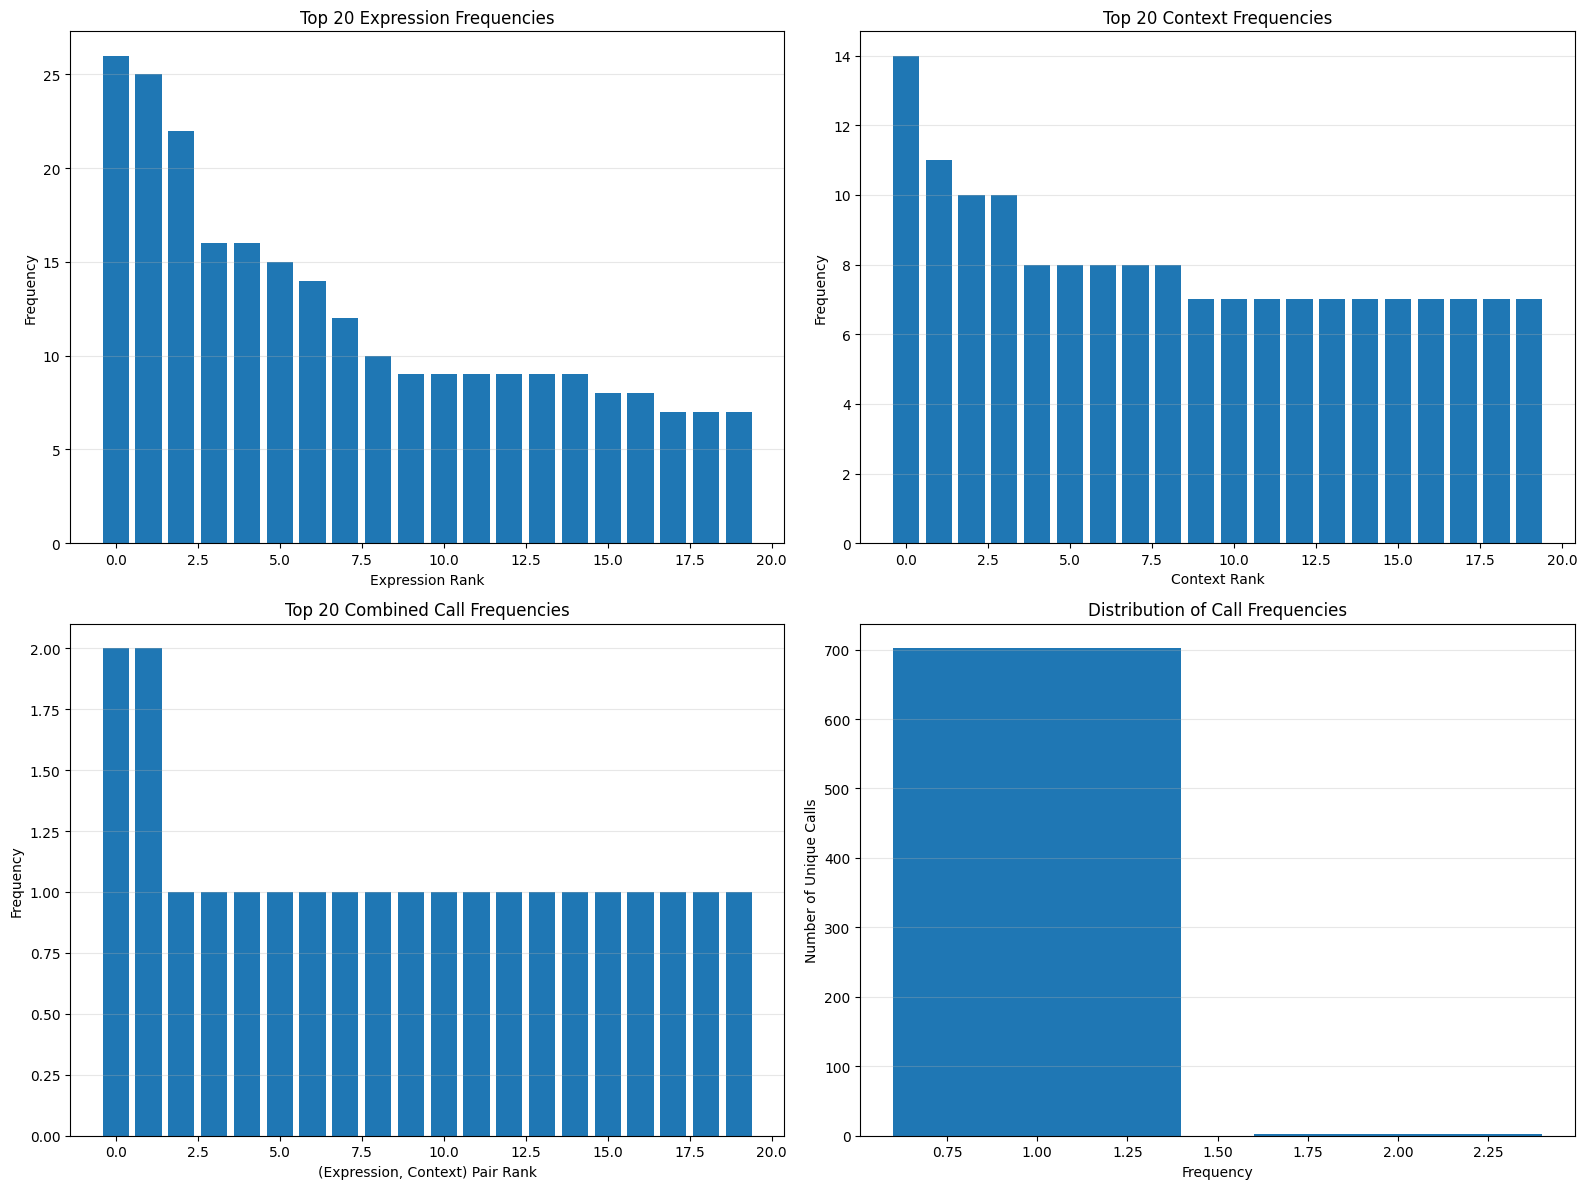

In [19]:
# Create subplots for different analyses
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Expression frequency histogram
expr_freqs = [count for _, count in sorted_expr_counts[:20]]  # Top 20
ax1.bar(range(len(expr_freqs)), expr_freqs)
ax1.set_title('Top 20 Expression Frequencies')
ax1.set_xlabel('Expression Rank')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.3)

# 2. Context frequency histogram
ctx_freqs = [count for _, count in sorted_context_counts[:20]]  # Top 20
ax2.bar(range(len(ctx_freqs)), ctx_freqs)
ax2.set_title('Top 20 Context Frequencies')
ax2.set_xlabel('Context Rank')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.3)

# 3. Combined call frequency histogram
combined_freqs = [count for _, count in sorted_combined_counts[:20]]  # Top 20
ax3.bar(range(len(combined_freqs)), combined_freqs)
ax3.set_title('Top 20 Combined Call Frequencies')
ax3.set_xlabel('(Expression, Context) Pair Rank')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', alpha=0.3)

# 4. Distribution of frequencies
freq_distribution = Counter([count for _, count in combined_counts.items()])
freq_vals, freq_counts = zip(*sorted(freq_distribution.items()))
ax4.bar(freq_vals, freq_counts)
ax4.set_title('Distribution of Call Frequencies')
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Number of Unique Calls')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



In [20]:
# Find calls that appear more than once and show them completely
print("=== COMPLETE DUPLICATE CALLS ===")
print("(Showing full expression and context for calls that appear multiple times)\n")

duplicates = [(call, count) for call, count in sorted_combined_counts if count > 1]

if not duplicates:
    print("No duplicate calls found - all calls are unique!")
else:
    print(f"Found {len(duplicates)} unique calls that appear multiple times")
    print(f"Total duplicate occurrences: {sum(count for _, count in duplicates)}")
    print("="*80)
    
    for i, ((expr, ctx), count) in enumerate(duplicates):
        print(f"\n{'='*20} DUPLICATE #{i+1} (appears {count} times) {'='*20}")
        print(f"EXPRESSION:")
        print(f"{expr}")
        print(f"\nCONTEXT:")
        print(f"{ctx}")
        
        # Show depths where this call appears
        matching_depths = [depths[j] for j, (e, c) in enumerate(zip(expressions, contexts)) if e == expr and c == ctx]
        print(f"\nDEPTHS WHERE THIS CALL APPEARS:")
        print(f"Depths: {sorted(matching_depths)}")
        depth_counts = Counter(matching_depths)
        for depth, depth_count in sorted(depth_counts.items()):
            print(f"  Depth {depth}: {depth_count} times")
        
        print("="*80)
        
        # Add a separator between entries for readability
        if i < len(duplicates) - 1:
            print()

# Summary statistics for duplicates
if duplicates:
    total_duplicate_calls = sum(count for _, count in duplicates)
    total_unique_duplicates = len(duplicates)
    max_duplicate_count = max(count for _, count in duplicates)
    
    print(f"\n{'='*20} DUPLICATE SUMMARY {'='*20}")
    print(f"Unique expressions/contexts that appear multiple times: {total_unique_duplicates}")
    print(f"Total calls from duplicates: {total_duplicate_calls}")
    print(f"Most frequent duplicate appears: {max_duplicate_count} times")
    print(f"Percentage of total calls that are duplicates: {(total_duplicate_calls/len(combined_calls)*100):.1f}%")
    
    # Depth analysis
    print(f"\n{'='*20} DEPTH ANALYSIS {'='*20}")
    depth_counts = Counter(depths)
    print(f"Depth distribution:")
    for depth in sorted(depth_counts.keys()):
        print(f"  Depth {depth}: {depth_counts[depth]} calls")


=== COMPLETE DUPLICATE CALLS ===
(Showing full expression and context for calls that appear multiple times)

Found 2 unique calls that appear multiple times
Total duplicate occurrences: 4

==================== DUPLICATE #1 (appears 2 times) ====================
EXPRESSION:
(~Bool.And : (arrow bool (arrow bool bool)))

CONTEXT:
context:
types:   [(init_tickingClock_0, int) (tickingClock, int)]
aliases: [Heap := (Map Ref (Map Field Box)), Struct := (Map Field Box)]
state:
tyGen: 148
tyPrefix: $__ty
exprGen: 9
exprPrefix: $__var
subst: ($__ty145, bool)
($__ty147, bool)
($__ty146, (arrow bool bool))
($__ty142, Box)
($__ty144, Ref)
($__ty143, (arrow Ref Box))
($__ty139, Ref)
($__ty141, Box)
($__ty140, (arrow Box Ref))
($__ty136, (arrow bool bool))
($__ty138, bool)
($__ty137, (arrow bool (arrow bool bool)))
($__ty133, bool)
($__ty135, Box)
($__ty134, (arrow Box bool))
($__ty132, Box)
($__ty129, bool)
($__ty131, bool)
($__ty130, (arrow bool bool))
($__ty126, Ref)
($__ty128, Box)
($__ty127, (a